In [184]:
# Import neccesary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import openpyxl
import seaborn as sns
from sklearn import metrics

In [185]:
df = pd.read_excel('Student-Employability-Datasets.xlsx')

In [186]:
df.head(2)

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   Student Performance Rating  2982 non-null   int64 
 9   CLASS                       2982 non-null   object
dtypes: int64(8), object(2)
memory usage: 233.1+ KB


In [188]:
df.shape

(2982, 10)

In [189]:
# For uniformity, change all column headers to uppercases
df.columns = df.columns.str.upper().str.replace(" ", "_")
# Map the CLASS column value to either 1 or 0
class_mapping = {'Employable':1, 'LessEmployable':0}
df['CLASS']=df['CLASS'].map(class_mapping)

In [190]:
df.head(2)

,NAME_OF_STUDENT,GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING,CLASS
0,Student 1,4,5,4,5,5,5,5,5,1
1,Student 2,4,4,4,4,4,4,3,5,1


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NAME_OF_STUDENT             2982 non-null   object
 1   GENERAL_APPEARANCE          2982 non-null   int64 
 2   MANNER_OF_SPEAKING          2982 non-null   int64 
 3   PHYSICAL_CONDITION          2982 non-null   int64 
 4   MENTAL_ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY_TO_PRESENT_IDEAS    2982 non-null   int64 
 7   COMMUNICATION_SKILLS        2982 non-null   int64 
 8   STUDENT_PERFORMANCE_RATING  2982 non-null   int64 
 9   CLASS                       2982 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 233.1+ KB


In [192]:
#Standardization
df = df.drop(columns=['NAME_OF_STUDENT'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)
corr = np.corrcoef(df_norm)
corr

array([[ 1.        ,  0.10482848, -0.23759548, ...,  0.47809144,
        -0.21821789,  0.10482848],
       [ 0.10482848,  1.        ,  0.42341516, ...,  0.61394061,
         0.08006408,  0.65384615],
       [-0.23759548,  0.42341516,  1.        , ...,  0.14199046,
         0.82956136,  0.19925419],
       ...,
       [ 0.47809144,  0.61394061,  0.14199046, ...,  1.        ,
        -0.18257419,  0.61394061],
       [-0.21821789,  0.08006408,  0.82956136, ..., -0.18257419,
         1.        , -0.16012815],
       [ 0.10482848,  0.65384615,  0.19925419, ...,  0.61394061,
        -0.16012815,  1.        ]])

In [193]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
df_norm = pd.DataFrame(df_norm)
X = df_norm.iloc[:, :-1]
Y = df_norm.iloc[:, -1]

In [194]:
#split the data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Create an instance of logistic regression class
logreg = LogisticRegression()
# Create Grid Seacrh Object
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}  
grid_search = GridSearchCV(logreg, parameters, cv=10) 
# Fit the grid model to the training data
logreg_cv = grid_search.fit(X_train, Y_train)
print('hypertuned parameters: (best parameters) ', logreg_cv.best_params_)
print('accuracy: ', logreg_cv.best_score_)
# Make predictions on the test data 
Yhat = logreg_cv.predict(X_test)
Yhat[0:20]

hypertuned parameters: (best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy:  0.6155251221827643


array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [195]:
# OBJECTIVE 2 & 7(?) higher coefficine = higher predictive value(?) hirap I code ng p-values, excel nlng HAHHAHA
# Get the feature names from the column names
feature_names = X.columns
# Get the coefficients of the logistic regression model
coef = logreg_cv.best_estimator_.coef_[0]
# Zip the feature names with the coefficients into a list of tuples
coef_list = list(zip(feature_names, coef))
# Print the feature names and their corresponding coefficients
for feature, coef in coef_list:
    print(feature, coef)

0 0.04139805107983558
1 1.5166321020970044
2 0.323696944227644
3 1.3424652598357456
4 -0.11485380065325038
5 -1.1508993030074988
6 -0.08961632407014511
7 -0.0007125234341748374


Accuracy Score: 0.59
Confusion Matrix: 
 [[ 95 170]
 [ 72 260]]


<AxesSubplot: >

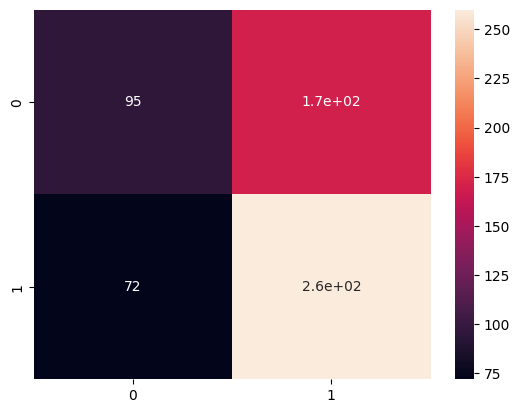

In [196]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Accurracy score
acc = accuracy_score(Y_test, Yhat)
print('Accuracy Score: %.2f'% acc)
# Confusion Matrix
Cmat = confusion_matrix(Y_test, Yhat)
print('Confusion Matrix: \n', Cmat)
# plot confusion_matrix
sns.heatmap(Cmat, annot=True)

In [197]:
from sklearn.metrics import classification_report, roc_auc_score
# Classification report
class_report = classification_report(Y_test, Yhat)
print("Classification Report: \n", class_report)
# AUC-ROC score
Yhat_proba = logreg_cv.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(Y_test, Yhat_proba)
print("AUC-ROC Score: ", auc_roc)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.57      0.36      0.44       265
         1.0       0.60      0.78      0.68       332

    accuracy                           0.59       597
   macro avg       0.59      0.57      0.56       597
weighted avg       0.59      0.59      0.57       597

AUC-ROC Score:  0.6401113889520346


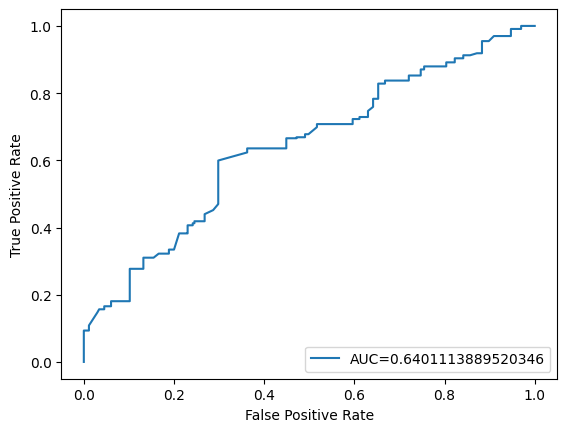

In [198]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Yhat_proba)
auc = metrics.roc_auc_score(Y_test,  Yhat_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [199]:
#K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of your K Nearest Neighbour Class
knn = KNeighborsClassifier()
# Create a grid search object
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
grid_search= GridSearchCV(knn, parameters, cv=10)
# Fit the model on the training data
knn_cv = grid_search.fit(X_train, Y_train)
print('hypertuned parameters: (best parameters) ', knn_cv.best_params_)
print('accuracy: ', knn_cv.best_score_)
# Make predictions on the test data 
Yhat = knn_cv.predict(X_test)
Yhat[0:20]

hypertuned parameters: (best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy:  0.9006258570373756


array([1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0.])

Accuracy Score: 0.91
Confusion Matrix: 
 [[243  22]
 [ 30 302]]


<AxesSubplot: >

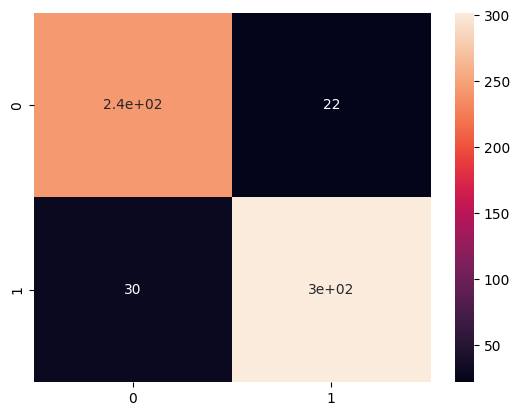

In [200]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Accurracy score
acc = accuracy_score(Y_test, Yhat)
print('Accuracy Score: %.2f'% acc)
# Confusion Matrix
Cmat = confusion_matrix(Y_test, Yhat)
print('Confusion Matrix: \n', Cmat)
# plot_confusion_matrix
sns.heatmap(Cmat, annot=True)

In [201]:
from sklearn.metrics import classification_report, roc_auc_score
# Classification report
class_report = classification_report(Y_test, Yhat)
print("Classification Report: \n", class_report)
# AUC-ROC score
Yhat_proba = knn_cv.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(Y_test, Yhat_proba)
print("AUC-ROC Score: ", auc_roc)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       265
         1.0       0.93      0.91      0.92       332

    accuracy                           0.91       597
   macro avg       0.91      0.91      0.91       597
weighted avg       0.91      0.91      0.91       597

AUC-ROC Score:  0.9790691066151398


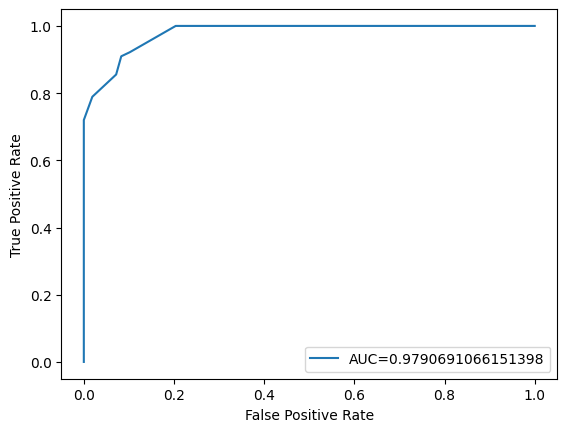

In [202]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Yhat_proba)
auc = metrics.roc_auc_score(Y_test,  Yhat_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [203]:
#Decision Tree Clasifier
from sklearn.tree import DecisionTreeClassifier
# Create an instance of Decision Tree Object
tree = DecisionTreeClassifier()
# Create a grid object
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
grid_search= GridSearchCV(tree, parameters, cv=10)
# Fit the model to the training set
tree_cv = grid_search.fit(X_train, Y_train)
print('hypertuned parameters: (best parameters) ', tree_cv.best_params_)
print('accuracy: ', tree_cv.best_score_)
# Make predictions on the test data
Yhat = tree_cv.predict(X_test)
Yhat[0:20]

hypertuned parameters: (best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy:  0.8956031785098977


array([1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0.])

In [204]:
from sklearn.metrics import classification_report, roc_auc_score
# Classification report
class_report = classification_report(Y_test, Yhat)
print("Classification Report: \n", class_report)
# AUC-ROC score
Yhat_proba = tree_cv.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(Y_test, Yhat_proba)
print("AUC-ROC Score: ", auc_roc)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       265
         1.0       0.93      0.91      0.92       332

    accuracy                           0.91       597
   macro avg       0.91      0.91      0.91       597
weighted avg       0.91      0.91      0.91       597

AUC-ROC Score:  0.9818936121845875


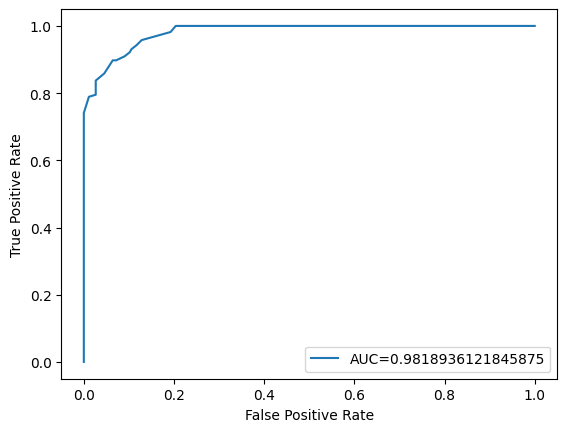

In [205]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Yhat_proba)
auc = metrics.roc_auc_score(Y_test,  Yhat_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [206]:
# OBJECTIVE 4 & 6
# Method that performed best
print('Accuracy for Logistics Regression method:', logreg_cv.score(X_test, Y_test))
print('Accuracy for Decision tree method:', tree_cv.score(X_test, Y_test))
print('Accuracy for K nearest neighbors method:', knn_cv.score(X_test, Y_test))

Accuracy for Logistics Regression method: 0.5946398659966499
Accuracy for Decision tree method: 0.9095477386934674
Accuracy for K nearest neighbors method: 0.9128978224455612


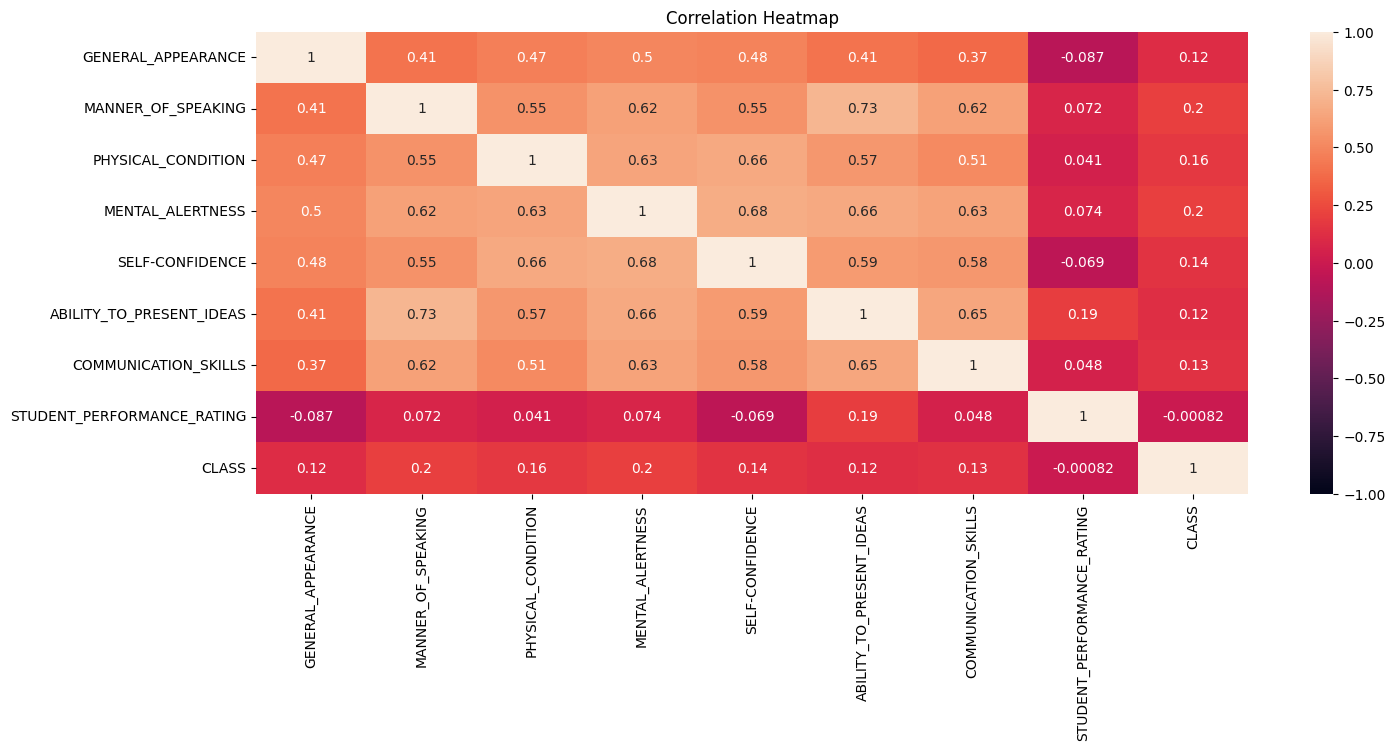

In [207]:
# OBJECTIVE 1

# Plot matrix
plt.figure(figsize=(16, 6))
plt.title("Correlation Heatmap")
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

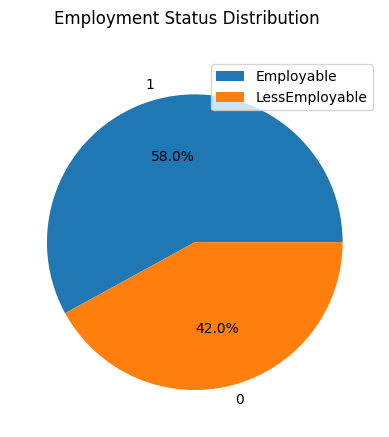

In [208]:
# OBJECTIVE 3
#Pie Chart
# Count the number of observations
class_counts = df['CLASS'].value_counts()
class_counts
# Plot the pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.legend(['Employable', 'LessEmployable'])
plt.suptitle('Employment Status Distribution')
# plt.rcParams.update({'font.size':16})
plt.show()

In [276]:
new_df = pd.read_excel('SE-TestData.xlsx')
new_df.head(5)

,NAME OF STUDENT,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
0,Student A,4,5,4,2,3,2,5,2
1,Student B,3,2,5,4,4,4,4,2
2,Student C,5,5,2,3,2,5,2,4
3,Student D,4,5,2,5,5,3,3,4
4,Student E,4,3,3,2,3,4,5,5


In [277]:
new_df.tail(2)

,NAME OF STUDENT,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
12,Student M,2,2,3,4,4,5,5,4
13,Student N,2,5,2,5,2,4,2,4


In [278]:
# For uniformity, change all column headers to uppercases
new_df.columns = new_df.columns.str.upper().str.replace(" ", "_")
new_df.head(3)

,NAME_OF_STUDENT,GENERAL_APPEARANCE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING
0,Student A,4,5,4,2,3,2,5,2
1,Student B,3,2,5,4,4,4,4,2
2,Student C,5,5,2,3,2,5,2,4


In [279]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NAME_OF_STUDENT             14 non-null     object
 1   GENERAL_APPEARANCE          14 non-null     int64 
 2   MANNER_OF_SPEAKING          14 non-null     int64 
 3   PHYSICAL_CONDITION          14 non-null     int64 
 4   MENTAL_ALERTNESS            14 non-null     int64 
 5   SELF-CONFIDENCE             14 non-null     int64 
 6   ABILITY_TO_PRESENT_IDEAS    14 non-null     int64 
 7   COMMUNICATION_SKILLS        14 non-null     int64 
 8   STUDENT_PERFORMANCE_RATING  14 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.1+ KB


In [280]:
#Standardization
new_df = new_df.drop(columns=['NAME_OF_STUDENT'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df_norm = scaler.fit_transform(new_df)
corr = np.corrcoef(new_df_norm)
corr

array([[ 1.        , -0.05129892, -0.11633501, -0.1582896 ,  0.11633501,
        -0.21974391, -0.2353244 ,  0.02139313,  0.09048279,  0.48420012,
        -0.77336028,  0.43157895, -0.45018317, -0.37515429],
       [-0.05129892,  1.        , -0.66143783, -0.53405175, -0.31497039,
        -0.06299408,  0.31277162, -0.83405766, -0.69293487,  0.4719399 ,
         0.15075567, -0.76948376,  0.39378077, -0.48112522],
       [-0.11633501, -0.66143783,  1.        ,  0.22428065,  0.14285714,
        -0.14285714, -0.3940552 ,  0.70929937,  0.80952381, -0.35675303,
        -0.22792115,  0.4265617 , -0.38271893,  0.50917508],
       [-0.1582896 , -0.53405175,  0.22428065,  1.        , -0.40370517,
         0.04485613, -0.27220719,  0.12373054,  0.16447248, -0.5280845 ,
         0.5367422 ,  0.1582896 , -0.2536944 ,  0.4796321 ],
       [ 0.11633501, -0.31497039,  0.14285714, -0.40370517,  1.        ,
         0.01587302, -0.02627035,  0.49913659,  0.52380952,  0.0849412 ,
        -0.41785545,  0.40

In [281]:
new_df_norm = pd.DataFrame(new_df_norm)
X = new_df_norm.iloc[:, :-1]
Y = new_df_norm.iloc[:, -1]